In [85]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2 as cv
import os


# INSERT GAMBAR, GRAYSCALE

Kode di atas mengimplementasikan fungsi `insertGambar` yang digunakan untuk membaca dan memproses gambar-gambar dalam folder yang ditentukan. Fungsi ini menggunakan library `os` untuk mengiterasi melalui direktori dalam `folder` dan mengumpulkan informasi tentang gambar-gambar tersebut. Dalam setiap iterasi, gambar dibaca menggunakan `cv.imread` dengan mode pembacaan 255, yang mengacu pada mode warna RGB. Nama file dan label dari gambar tersebut ditambahkan ke list `filenames` dan `labels` masing-masing. Gambar yang berhasil dibaca ditambahkan ke list `images`. Akhirnya, fungsi mengembalikan tiga list tersebut: `images` yang berisi gambar-gambar, `filenames` yang berisi nama-nama file, dan `labels` yang berisi label-label gambar.

In [93]:
def insertGambar(folder):
    images = [] 
    filenames = [] 
    labels = [] 

    for label in os.listdir(folder): 
        for filename in os.listdir("Training/"+label): 
            img = cv.imread(os.path.join("Training/"+label,filename), 255) 
            filenames.append(filename) 
            labels.append(label) 
            if img is not None: 
                images.append(img) 
    return images, filenames, labels 

images, filenames, labels = insertGambar("Training")


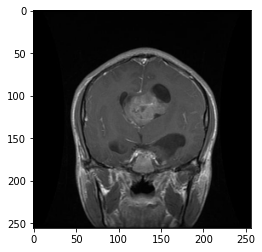

In [94]:
plt.imshow(images[1])

In [95]:
print(len(images))

5712


# Resize

Fungsi `resize_image` di bawah mengimplementasikan pemrosesan untuk mengubah ukuran gambar dengan persentase skala yang ditentukan. Fungsi ini menerima masukan berupa list `image` yang berisi gambar-gambar yang ingin diubah ukurannya, serta `scale_percent` yang merupakan persentase skala yang diterapkan pada gambar. Dalam setiap iterasi, fungsi menghitung lebar dan tinggi baru berdasarkan persentase skala dan ukuran awal gambar menggunakan `img.shape`. Kemudian, dimensi baru tersebut digunakan untuk meresize gambar menggunakan `cv.resize` dengan metode interpolasi `cv.INTER_AREA` yang menghasilkan hasil resize yang baik untuk mereduksi ukuran gambar. Gambar yang sudah diresize ditambahkan ke dalam list `resized_images`. Akhirnya, fungsi mengembalikan list `resized_images` yang berisi gambar-gambar yang sudah diubah ukurannya sesuai dengan persentase skala yang ditentukan.

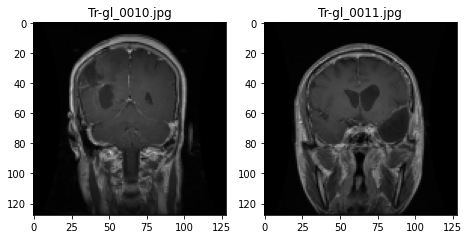

In [96]:
def resize_image(image, scale_percent):
    resized_images = []
    for img in image:
        width = int(img.shape[1] * scale_percent / 100)
        height = int(img.shape[0] * scale_percent / 100)
        dim = (width, height)
        resized = cv.resize(img, dim, interpolation=cv.INTER_AREA)
        resized_images.append(resized)
    return resized_images

fig = plt.figure(figsize=(20,20))
columns = 5 
rows = 3
x = 10 
for i in range(1,3): 
    fig.add_subplot(rows, columns, i) 
    plt.title(filenames[x]) 
    plt.imshow(resize_image([images[x]], scale_percent=50)[0], cmap="gray") 
    x+=1 

plt.show()


In [90]:
savePath = "hasil/resize/"
os.makedirs(savePath, exist_ok=True)  # Membuat direktori "hasil/resize/" jika belum ada
for i in range(len(images)):
    save = os.path.join(savePath, filenames[i])
    save = os.path.splitext(save)[0] + ".jpg"  # Mengganti ekstensi gambar menjadi .jpg
    rgb_image = cv.cvtColor(images[i], cv.COLOR_BGR2RGB)  # Mengubah citra menjadi format warna RGB
    cv.imwrite(save, rgb_image)


KeyboardInterrupt: 

# AUGMENTASI ROTASI

Fungsi rotasi di dibawah mengimplementasikan pemrosesan rotasi pada citra menggunakan metode transformasi geometri. Fungsi ini menerima input berupa derajat yang merupakan sudut rotasi yang diinginkan,

In [97]:
def rotasi(derajat, citra):
    panjang, lebar, _ = citra.shape  # Memperoleh dimensi panjang dan lebar citra
    Rotasi_img = np.zeros(citra.shape)

    sudut = derajat * (np.pi / 180)
    tengahx = panjang / 2
    tengahy = lebar / 2

    for i in range(panjang):
        for j in range(lebar):
            x = int((i - tengahx) * np.cos(sudut) - (j - tengahy) * np.sin(sudut) + tengahx)
            y = int((i - tengahx) * np.sin(sudut) + (j - tengahy) * np.cos(sudut) + tengahy)
            if 0 <= x < panjang and 0 <= y < lebar:
                Rotasi_img[i][j] = citra[x][y]

    return Rotasi_img

Kode di bawah ini bertujuan untuk menampilkan citra asli dan citra hasil rotasi dengan sudut yang telah ditentukan. Sudut rotasi yang ingin ditampilkan disimpan dalam list `sudut_rotasi`, sedangkan indeks citra yang ingin ditampilkan disimpan dalam variabel `index_citra`. Pada kode tersebut, citra yang ingin ditampilkan diambil dari list `images` menggunakan `index_citra`. Selanjutnya, dilakukan iterasi melalui setiap sudut rotasi pada `sudut_rotasi`. Setiap citra asli dan citra hasil rotasi dengan sudut tertentu ditampilkan secara visual menggunakan library matplotlib, dengan judul citra sesuai dengan sudut rotasi yang sedang diproses.

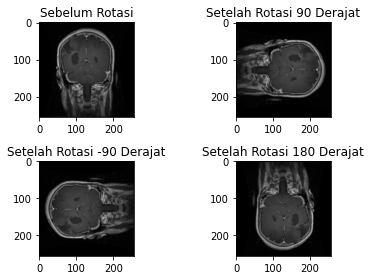

In [98]:
sudut_rotasi = [90, -90, 180]  # Sudut rotasi yang ingin ditampilkan
index_citra = 10  # Indeks citra yang ingin ditampilkan

# Mengambil citra yang dipilih
citra = images[index_citra]

# Menampilkan citra sebelum rotasi
plt.subplot(2, 2, 1)
plt.imshow(citra)
plt.title('Sebelum Rotasi')

# Menampilkan citra dengan sudut rotasi tertentu
for i, sudut in enumerate(sudut_rotasi):
    rotated_image = rotasi(sudut, citra)
    rotated_image = np.clip(rotated_image, 0, 255).astype(np.uint8)  # Memastikan rentang piksel valid [0, 255]
    plt.subplot(2, 2, i+2)
    plt.imshow(rotated_image)
    plt.title(f'Setelah Rotasi {sudut} Derajat')

plt.tight_layout()
plt.show()

In [ ]:
savePath = "hasil/rotasi/"  # Ubah path ke folder hasil rotasi sesuai kebutuhan
sudut_rotasi = [90]  # Sudut rotasi yang ingin Anda terapkan
rotasi_data = []  # List untuk menyimpan citra hasil rotasi
os.makedirs(savePath, exist_ok=True)
for i in range(len(images)):
    for sudut in sudut_rotasi:
        # Menerapkan rotasi pada citra
        rgb_image = cv.cvtColor(images[i], cv.COLOR_BGR2RGB)
        hasil_rotasi = rotasi(sudut, rgb_image)  # Menggunakan sudut rotasi dari daftar sudut_rotasi

        # Menyimpan citra hasil rotasi
        save = savePath + f"{filenames[i]}_{sudut}.jpg"  # Menambahkan sudut rotasi pada nama file
        cv.imwrite(save, hasil_rotasi)

        # Menyimpan citra hasil rotasi ke dalam list rotasi_data
        rotasi_data.append(hasil_rotasi)

# TRESHOLDING

Metode manual_thresholding di bawah merupakan sebuah fungsi untuk melakukan thresholding secara manual pada sebuah gambar. Fungsi ini menerima dua parameter, yaitu image yang merupakan gambar yang akan di-threshold, dan threshold yang merupakan nilai ambang batas.

In [99]:
def manual_thresholding(image, threshold):
    if len(image.shape) == 3:  # Gambar berwarna
        gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    else:  # Gambar grayscale
        gray = image

    rows, cols = gray.shape
    thresholded_image = np.zeros((rows, cols), dtype=np.uint8)

    for i in range(rows):
        for j in range(cols):
            if gray[i, j] >= threshold:
                thresholded_image[i, j] = 255
            else:
                thresholded_image[i, j] = 0

    return thresholded_image


Kode di atas melakukan thresholding manual pada setiap citra dalam list `images` dengan menggunakan nilai threshold yang ditentukan. Nilai threshold yang digunakan disimpan dalam variabel `threshold`. Dalam setiap iterasi, fungsi `manual_thresholding` dipanggil untuk melakukan thresholding pada citra dengan menggunakan nilai threshold tersebut. Citra hasil thresholding kemudian ditambahkan ke dalam list `thresholded_images`. Dengan demikian, kode tersebut menghasilkan list `thresholded_images` yang berisi citra-citra yang telah mengalami proses thresholding menggunakan nilai threshold yang telah ditentukan.

In [100]:
thresholded_images = []
threshold = 50  # Nilai threshold yang digunakan

for image in images:
    thresholded_image = manual_thresholding(image, threshold)
    thresholded_images.append(thresholded_image)


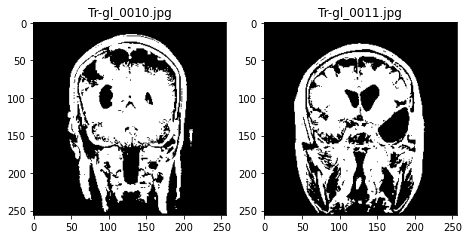

In [101]:
fig = plt.figure(figsize=(20,20))
columns = 5 
rows = 3
x = 10 
for i in range(1,3): 
    fig.add_subplot(rows, columns, i) 
    plt.title(filenames[x]) 
    plt.imshow(thresholded_images[x], "gray") 
    x+=1 

In [ ]:
savePath = "hasil/treshold/"
os.makedirs(savePath, exist_ok=True)
for i in range(len(images)):
    # Menerapkan tresholding pada citra menggunakan metode BINARY
    ret, treshold = cv.threshold(images[i], 50, 255, cv.THRESH_BINARY)

    # Menyimpan citra hasil tresholding
    save = savePath + filenames[i] + ".jpg"
    cv.imwrite(save, treshold)


# EDGE DETECTION

Fungsi cv.Canny merupakan metode populer dalam pengolahan citra untuk mendeteksi tepi. Pada kode di bawah, fungsi cv.Canny digunakan untuk menerapkan deteksi tepi Canny pada citra yang telah melalui proses thresholding sebelumnya. Argumen pertama adalah citra yang akan diproses, sedangkan argumen kedua dan ketiga adalah nilai ambang bawah (threshold1) dan nilai ambang atas (threshold2). Deteksi tepi Canny mengidentifikasi perbedaan intensitas piksel yang signifikan dalam citra, menghasilkan garis tepi yang lebih tajam dan akurat dibandingkan dengan metode deteksi tepi lainnya.

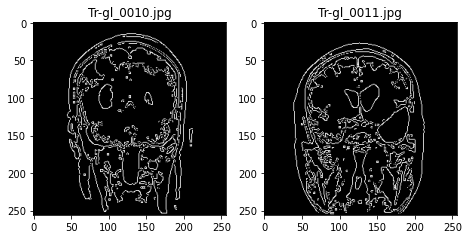

In [102]:

canny_images = []
threshold1 = 100  # Nilai ambang bawah
threshold2 = 200  # Nilai ambang atas

for image in thresholded_images:
    canny_image = cv.Canny(image, threshold1, threshold2)
    canny_images.append(canny_image)

fig = plt.figure(figsize=(20, 20))
columns = 5
rows = 3
x = 10
for i in range(1, 3):
    fig.add_subplot(rows, columns, i)
    plt.title(filenames[x])
    plt.imshow(canny_images[x], cmap="gray")
    x += 1

plt.show()


In [ ]:
savePath = "hasil/canny_images/"
os.makedirs(savePath, exist_ok=True)
for i in range(len(images)):
    image = images[i]
    canny_image = cv.Canny(image, 100, 200)  # Lakukan edge detection pada citra

    # Menyimpan citra hasil edge detection
    filename = f"canny_{i}.jpg"
    save = os.path.join(savePath, filename)
    cv.imwrite(save, canny_image)
    


# SEGMENTASI

Segmentasi yang dilakukan pada kode di bawah menggunakan metode penggambaran kontur dan mask, di mana kontur dengan area terbesar diambil dari citra hasil deteksi tepi Canny dan digunakan untuk membuat mask yang akan diterapkan pada citra asli untuk menghasilkan citra segmentasi.

In [103]:
masked = []
segmented = []
for i in range (len(canny_images)):
    cnt = sorted(cv.findContours(canny_images[i], cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)[-2], key=cv.contourArea)[-1]
    mask = np.zeros(images[i].shape[0:2], dtype='uint8')
    masked.append(cv.drawContours(mask, [cnt],-1, 255, -1))
    dst = cv.bitwise_and(images[i], images[i], mask=mask)
    segmented.append(cv.cvtColor(dst, cv.COLOR_BGR2RGB))

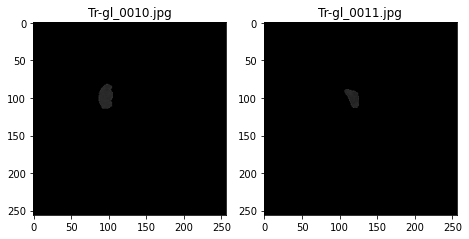

In [104]:
fig = plt.figure(figsize=(20, 20))
columns = 5
rows = 3
x = 10
for i in range(1, 3):
    fig.add_subplot(rows, columns, i)
    plt.title(filenames[x])
    plt.imshow(segmented[x], "gray")
    x += 1

plt.show()


In [ ]:
savePath = "hasil/segmentasi/"
os.makedirs(savePath, exist_ok=True)

for i in range(len(segmented)):
    # Save the segmented image
    filename = f"segmented_{i}.jpg"
    save = os.path.join(savePath, filename)
    cv.imwrite(save, segmented[i])
